<font size="5">Poliastro</font>

Poliastro is a Python Module for Astrodynamics and Orbital Mechanics, focusing on interplanetary applications

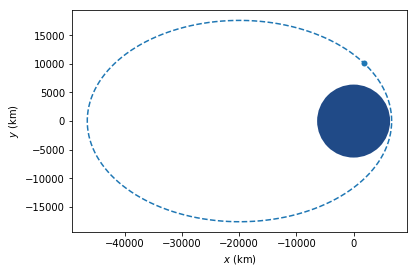

In [18]:
import matplotlib.pyplot as plt #imports Matplotlib for graphing
plt.ion()  #To immediately show plots

from poliastro.examples import molniya
from poliastro.plotting import plot

plot(molniya)

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion() # To immediately show plots

from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit

plt.style.use("seaborn")


r = [-321, -3450, 500] * u.km
v = [-1.67, 9.68, 1.53] * u.km / u.s
ss = Orbit.from_vectors(Earth, r, v)

In [26]:
ss

236 x 5949 km x 131.2 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

In [27]:
ss.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [28]:
ss.epoch.iso

'2000-01-01 12:00:00.000'

In [29]:
ss.frame

<GCRS Frame (obstime=J2000.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s)>

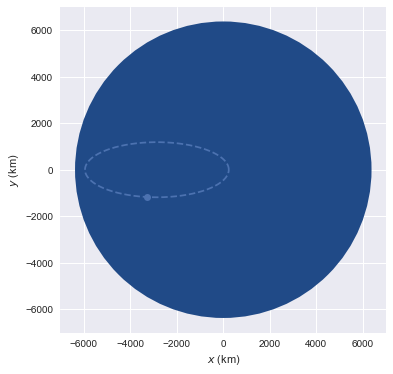

In [30]:
from poliastro.plotting import plot
plot(ss)

In [31]:
# Data for Mars at J2000 from JPL HORIZONS

a = 1.523679 * u.AU
ecc = 0.093315 * u.one
inc = 1.85 * u.deg
raan = 49.562 * u.deg
argp = 286.537 * u.deg
nu = 23.33 * u.deg
ss = Orbit.from_classical(Sun,a, ecc, inc, raan, argp, nu)

In [32]:
ss.state.period.to(u.day)

<Quantity 686.97138348 d>

In [33]:
ss.state.v

<Quantity [ 1.16420212, 26.29603633,  0.52229379] km / s>

In [34]:
from poliastro.examples import iss
iss

6772 x 6790 km x 51.6 deg (GCRS) orbit around Earth (♁) at epoch 2013-03-18 12:00:00.000 (UTC)

In [35]:
iss.epoch

<Time object: scale='utc' format='iso' value=2013-03-18 12:00:00.000>

In [36]:
iss.nu.to(u.deg)

<Quantity 46.59580468 deg>

In [37]:
iss.n.to(u.deg / u.min)

<Quantity 3.88701058 deg / min>

In [38]:
iss_30m = iss.propagate(30 * u.min)
iss_30m.epoch

<Time object: scale='utc' format='iso' value=2013-03-18 12:30:00.000>

In [39]:
iss_30m.nu.to(u.deg)

<Quantity 163.1409362 deg>

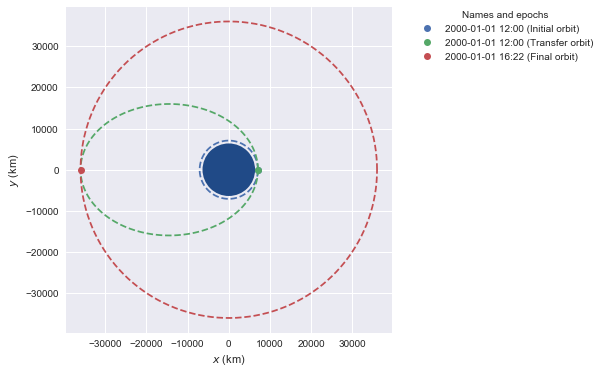

In [47]:
from poliastro.maneuver import Maneuver

ss_i = Orbit.circular(Earth, alt=700 * u.km)
hoh = Maneuver.hohmann(ss_i, 36000 * u.km)
ss_f = ss_i.apply_maneuver(hoh)



from poliastro.plotting import OrbitPlotter
op = OrbitPlotter()
ss_a, ss_f = ss_i.apply_maneuver(hoh, intermediate=True)
op.plot(ss_i, label="Initial orbit")
op.plot(ss_a, label="Transfer orbit")
op.plot(ss_f, label="Final orbit")

In [48]:
from astropy import time
epoch = time.Time("2015-05-09 10:43") # UTC by default

from poliastro import ephem
Orbit.from_body_ephem(Earth, epoch)

C:\Users\acham\Anaconda3\lib\site-packages\poliastro\twobody\orbit.py:202: TimeScaleWarning:

Input time was converted to scale='tdb' with value 2015-05-09 10:44:07.185. Use Time(..., scale='tdb') instead.



1 x 1 AU x 23.4 deg (ICRS) orbit around Sun (☉) at epoch 2015-05-09 10:44:07.185 (TDB)

In [52]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [53]:
from astropy import units as u

T_ref = 150 * u.day
T_ref

<Quantity 150. d>

In [77]:
def func(theta):
    V_2_v, _ = compute_flyby(v1_pre, V, Venus.k, d_flyby_1, theta * u.rad)
    ss_1 = Orbit.from_vectors(Sun, ss1.r, V_2_v, epoch=flyby_1_time)
    return (ss_1.period - T_ref).to(u.day).value